## Goal of notebook

This notebook accompanies [sSVN](https://github.com/leviyevalex/sSVN), and provides an example of how to run on the double banana. Since this is a two dimensional example, we take this opportunity to compare the flows of sSVN to the flows of SVGD (https://arxiv.org/abs/1608.04471), sSVGD (https://arxiv.org/abs/1812.00071), and SVN (https://arxiv.org/abs/1806.03085). We encourage the reader to tinker with the stepsize `eps` and particle number `nParticles`. If desired, the kernel bandwidth `h` may be modified in `src/samplers.py`.
The SVGD and SVN dynamics, once discretized, yield equations for the time evolution of a system of interacting particles. Both the stochastic version of SVGD (sSVGD) and our proposed stochastic version of SVN (sSVN) add a "thermal" noise term to the dynamics which correct for asymptotic errors introduced by discretization. This yields a noisy interacting particle system which has theoretical guarantees to equilibrate to the posterior.

### Import tools

In [1]:
%matplotlib notebook
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
from IPython import display

In [2]:
from src.samplers import samplers
from models.double_banana import double_banana
from scripts.create_contour import create_contour
from scripts.create_animation import animate_driver

### Instantiate the double banana model

In [3]:
model = double_banana()

### Run SVGD dynamics

In [4]:
sampler1 = samplers(model=model, nIterations=100, nParticles=300, profile=False)
sampler1.apply(method='SVGD', eps=0.1)

Stepsize 0.100000 | Median bandwidth: 3.061835: 100%|██████████| 100/100 [00:17<00:00,  5.88it/s]

INFO:src.samplers:OUTPUT: Run completed successfully! Data stored in:
 C:\Users\Alex\sSVN\outdir\1651800766\output_data.h5


In [5]:
%%capture
contour_file_path1 = create_contour(sampler1)
animation_path1 = animate_driver(contour_file_path1, sampler1)

INFO:scripts.create_contour:Contour file does not exist for given settings! Creating...
INFO:scripts.create_contour:Successfully created contour file for given settings.
INFO:scripts.create_animation:Animating 100 frames
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Run sSVGD dynamics

In [6]:
sampler2 = samplers(model=model, nIterations=100, nParticles=300, profile=False)
sampler2.apply(method='sSVGD', eps=0.1)

Stepsize 0.100000 | Median bandwidth: 2.932424: 100%|██████████| 100/100 [00:23<00:00,  4.30it/s]

INFO:src.samplers:OUTPUT: Run completed successfully! Data stored in:
 C:\Users\Alex\sSVN\outdir\1651800801\output_data.h5


In [7]:
%%capture
contour_file_path2 = create_contour(sampler2)
animation_path2 = animate_driver(contour_file_path2, sampler2)

INFO:scripts.create_contour:Using contour file for given settings found in /outdir 
INFO:scripts.create_animation:Animating 100 frames
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Run SVN dynamics

In [8]:
sampler3 = samplers(model=model, nIterations=100, nParticles=300, profile=False)
sampler3.apply(method='SVN', eps=0.2)

Stepsize 0.200000 | Median bandwidth: 0.176544: 100%|██████████| 100/100 [00:29<00:00,  3.41it/s]

INFO:src.samplers:OUTPUT: Run completed successfully! Data stored in:
 C:\Users\Alex\sSVN\outdir\1651800831\output_data.h5


In [9]:
%%capture
contour_file_path3 = create_contour(sampler3)
animation_path3 = animate_driver(contour_file_path3, sampler3)

INFO:scripts.create_contour:Using contour file for given settings found in /outdir 
INFO:scripts.create_animation:Animating 100 frames
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Run sSVN dynamics

In [10]:
sampler4 = samplers(model=model, nIterations=100, nParticles=300, profile=False)
sampler4.apply(method='sSVN', eps=0.2)

Stepsize 0.200000 | Median bandwidth: 0.155102: 100%|██████████| 100/100 [00:21<00:00,  4.56it/s]

INFO:src.samplers:OUTPUT: Run completed successfully! Data stored in:
 C:\Users\Alex\sSVN\outdir\1651800870\output_data.h5


In [11]:
%%capture
contour_file_path4 = create_contour(sampler4)
animation_path4 = animate_driver(contour_file_path4, sampler4)

INFO:scripts.create_contour:Using contour file for given settings found in /outdir 
INFO:scripts.create_animation:Animating 100 frames
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Display animation

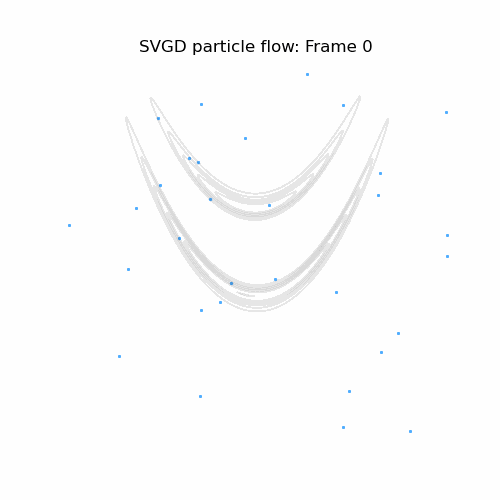

In [12]:
display.display(display.Image(animation_path1))

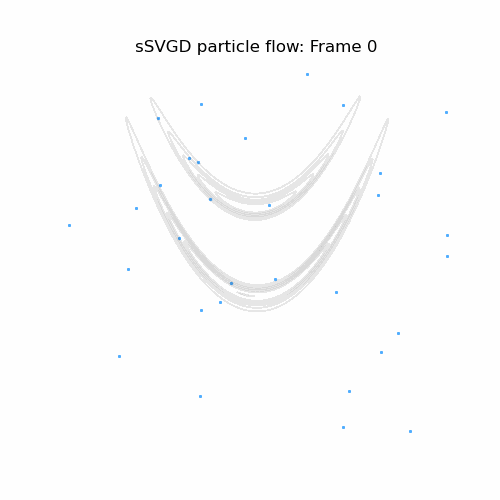

In [13]:
display.display(display.Image(animation_path2))

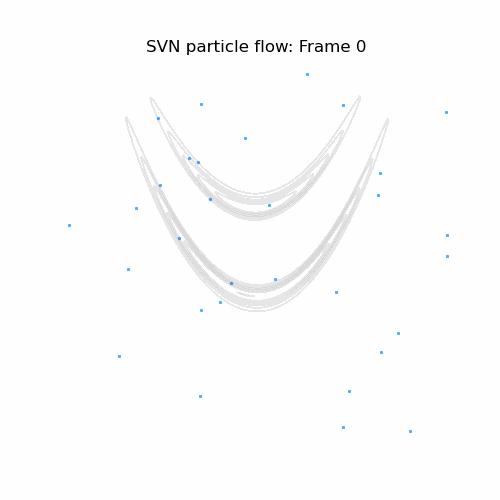

In [14]:
display.display(display.Image(animation_path3))

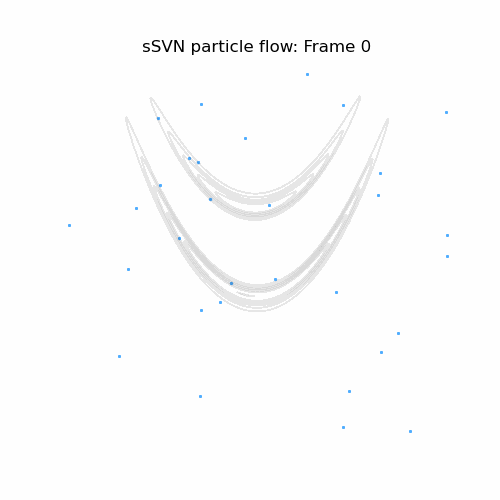

In [15]:
display.display(display.Image(animation_path4))